In [9]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\arshb\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import pandas as pd


Removing URLS

Extract Username and Hashtags from each tweet

Removing puncuations

Converting letters to lowercases

Removing html tags and attributes

Remove Stop Words

Lemmatizer

In [1]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [2]:
def Stemmer(text):
    st = PorterStemmer()
    return [st.stem(w) for w in text]

Data Cleaning
Function to Preprocess the Twitter Data - Data Cleaning

In [3]:
def tweetclean(tweetsdf, text):
  #remove URL
  tweetsdf[text] = tweetsdf[text].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
  #replace html to ASCII
  tweetsdf[text] = list(map(lambda x: x.encode('ascii', 'ignore').decode(), tweetsdf[text]))
  #extract hashtags and usernames from each tweet
  tweetsdf['hashtag'] = tweetsdf.text.str.findall(r'#.*?(?=\s|$)')
  tweetsdf['username'] = tweetsdf.text.str.findall(r'@.*?(?=\s|$)')
  # Remove punctuation
  tweetsdf[text] = tweetsdf[text].str.replace(r"[^a-zA-Z\d\_&.]+", " ")
  # to lowercase
  tweetsdf[text] = tweetsdf[text].str.lower()
  #removing stop words
  tweetsdf['tokenize_text'] = tweetsdf[text].apply(word_tokenize) #tokenizer
  # Remove stopword
  stop = stopwords.words('english')
  tweetsdf['tokenize_text'] = tweetsdf['tokenize_text'].apply(lambda x: [item for item in x if item not in stop])
  #Word Net Lemmatizer
  tweetsdf['tokenize_text'] = tweetsdf['tokenize_text'].apply(lemmatize_text)
  #Stemming
  tweetsdf['tokenize_text'] = tweetsdf['tokenize_text'].apply(Stemmer)


  return (tweetsdf)

In [12]:
electiontweets = pd.read_csv('Canadian_elections_2019.csv')

In [13]:
electiontweets

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
...,...,...,...
2128,negative,Scandal,b'You know he was doing a good enough job smea...
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...
2130,positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...
2131,negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...


In [6]:
electiontweets_clean = tweetclean(electiontweets, 'text')

In [7]:
generictweets = pd.read_csv('sentiment_analysis.csv')

In [8]:
generictweets_clean = tweetclean(generictweets, 'text')

EDA Canadian Elections

In [9]:
#function to flatten the list source Stackoverflow
def flatten(lis):
     from collections import Iterable
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item

In [10]:
#function to count the frequency of the words in a list
def countWords(wordList):
  from collections import Counter
  b = dict(Counter(wordList)) #using the counter function and converting the result into a dict
  return(b)

In [11]:
def filterTheDict(dictObj, callback):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            newDict[key] = value
    return newDict

In [12]:
#function to get key words from hashtags and usernames
def getwordfreq(wordlist):
  newlist = list(flatten(wordlist))
  newlist2 = [newlist[i].split('\\',1)[0] for i in range(0,len(newlist))] 
  newlist3 = countWords(newlist2)
  newDict = filterTheDict(newlist3, lambda elem: elem[1] > 3)
  return newDict

In [13]:
Hashtags_election_list = electiontweets_clean['hashtag'].tolist()

In [14]:
Username_election_list = electiontweets_clean['username'].tolist()

In [15]:
hashtagcounter = getwordfreq(Hashtags_election_list)

In [16]:
usernamecounter = getwordfreq(Username_election_list)

In [17]:
NDP = ['jagmeetsingh', 'ndp', 'uprising', 'votendp', 'emilietaman', 'minsooklee', 'garrison', 'thejagmeetsingh']
Conservative = ['andrewscheer', 'conservative', 'conservatives', 'ppc', 'ppc2019', 'ppc2019alltheway', 'ppcmajority', 'scheer', 'voteppc', 'erinotoolemp', 'lyleoberg', 'pierrepoilievre', 'fordnation', 'jkenney', 'lraitt']
Liberals = ['chooseforward', 'chooseforwardwithtrudeau', 'istandwithtrudeau', 'liberals', 'teamtrudeau', 'trudeau', 'voteliberal', 'votingliberal', 'jarogiesbrecht', 'justintrudeau', 'sheila', 'liberal_party', 'telfordk', 'vankayak']

In [18]:
for i in range(0, len(NDP)):
  electiontweets_clean.loc[electiontweets_clean['text'].str.contains(NDP[i]), 'Party'] = 'NDP'
for i in range(0, len(Conservative)):
  electiontweets_clean.loc[electiontweets_clean['text'].str.contains(Conservative[i]), 'Party'] = 'Conservative'
for i in range(0, len(Liberals)):
  electiontweets_clean.loc[electiontweets_clean['text'].str.contains(Liberals[i]), 'Party'] = 'Liberals'

In [19]:
electiontweets_clean['Party'].fillna('Other', inplace=True)

In [20]:
Count = dict(electiontweets_clean['Party'].value_counts())


In [21]:
del Count['Other']

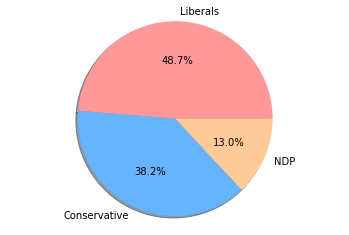

In [22]:
labels = []
sizes = []
for x, y in Count.items():
    labels.append(x)
    sizes.append(y)
colors = ['#ff9999','#66b3ff','#ffcc99']
# Plot
plt.pie(sizes, labels=labels, shadow=True, colors=colors,autopct='%1.1f%%')

plt.axis('equal')
plt.show()

EDA Sentiment analysis

In [23]:
generictweets_clean['length'] = generictweets_clean['text'].apply(len)
generictweets_clean.head()

,ID,text,label,hashtag,username,tokenize_text,length
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1,[],[],"[josh, jenkin, look, forward, tab, breeder, cr...",67
1,7.680980e+17,rt mianusmanjaved congratulations pakistan on ...,1,"[#No1TestTeam, #JI_PakZindabadRallies]",[@MianUsmanJaved:],"[rt, mianusmanjav, congratul, pakistan, becom,...",119
2,7.680980e+17,rt pepalerts this september yesmag is taking y...,1,[],"[@PEPalerts:, @YESmag]","[rt, pepalert, septemb, yesmag, take, main, me...",118
3,7.680980e+17,rt david_gaibis newly painted walls thanks a m...,1,[#EC_proud],[@david_gaibis:],"[rt, david_gaibi, newli, paint, wall, thank, m...",118
4,7.680980e+17,rt cedricfeschotte excited to announce as of j...,1,[],"[@CedricFeschotte:, @Cornell]","[rt, cedricfeschott, excit, announc, juli, 201...",103


Text(0, 0.5, 'Total Number of Tweets')

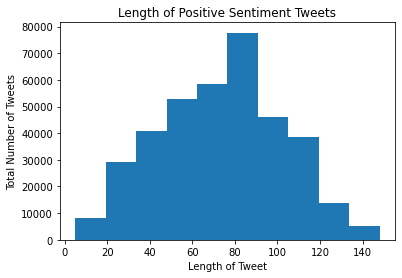

In [24]:
df_positive_sentiment = generictweets_clean[generictweets_clean['label']==1.0]
plt.hist(df_positive_sentiment['length'])
plt.title('Length of Positive Sentiment Tweets')
plt.xlabel('Length of Tweet')
plt.ylabel('Total Number of Tweets')

Text(0, 0.5, 'Total Number of Tweets')

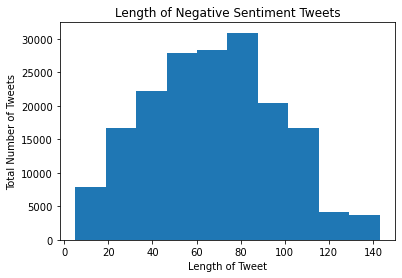

In [25]:
df_negative_sentiment = generictweets_clean[generictweets_clean['label']==0.0]
plt.hist(df_negative_sentiment['length'])
plt.title('Length of Negative Sentiment Tweets')
plt.xlabel('Length of Tweet')
plt.ylabel('Total Number of Tweets')

Text(0, 0.5, 'Total Number of Tweets')

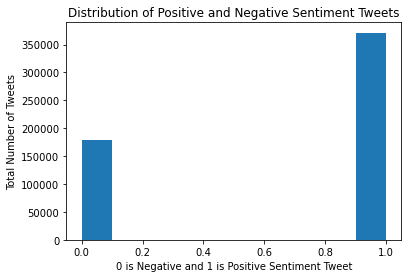

In [26]:
plt.hist(generictweets_clean['label'])
plt.title('Distribution of Positive and Negative Sentiment Tweets')
plt.xlabel('0 is Negative and 1 is Positive Sentiment Tweet')
plt.ylabel('Total Number of Tweets')

Model Preparation

Generic Tweets Model Building

In [27]:
generictweetdata = generictweets_clean['tokenize_text']

In [28]:
def remove_rt(elements):
    list_of_words =list()
    for element in elements:
        if element.startswith('rt'):
            list_of_words.append(element[2:])
        else:
            list_of_words.append(element)
    return ' '.join(list_of_words)

In [29]:
generictweetdata = generictweetdata.apply(remove_rt)

In [30]:
generictweetdata

0         josh jenkin look forward tab breeder crown sup...
1          mianusmanjav congratul pakistan becom no1test...
2          pepalert septemb yesmag take main mendoza sur...
3          david_gaibi newli paint wall thank million cu...
4          cedricfeschott excit announc juli 2017 fescho...
                                ...                        
550386                      goddesses_o stop watch ... mm .
550387    poor old tom odel look like would know wrong c...
550388              antsmash smash 7 ant awesom game hjfjfi
550389    lizhudston kymwylli evasmiless meanbok linddyl...
550390    bixbeat mixtap vol.2 great artist join movemen...
Name: tokenize_text, Length: 550391, dtype: object

Feature Selection by Lasso 

In [31]:
def featureselection(array, target, features, alphavalue):
  lasso = Lasso(alpha=alphavalue)
  lasso_coef = lasso.fit(array, target).coef_

  lasso_coef.shape
  plt.figure(figsize=(10,10))
  plt.plot(range(len(features)), lasso_coef)
  plt.xticks(range(len(features)),features, rotation = 90)
  plt.ylabel("Coefficients")
  Coef = list(lasso_coef)

  df_coef = pd.DataFrame({'Feature Name':features, 'Coefficients':Coef})
  df_coef = df_coef[(df_coef[['Coefficients']] != 0).all(axis=1)]

  Selected_features = list(df_coef["Feature Name"].unique())
  print(Selected_features)

  df = pd.DataFrame.sparse.from_spmatrix(array, columns=features)
  Newdf = df[Selected_features].copy()

  return(Newdf)

BAG OF WORDS

In [32]:
def bow(data, maxfeature):
  bow = CountVectorizer(max_features = maxfeature)
  bow_vectors = bow.fit_transform(data)
  bow_feature_names = bow.get_feature_names()
  bow_array = bow_vectors

  return(bow_array, bow_feature_names)

In [33]:
labels = np.array(generictweets_clean['label'])

In [34]:
Array_bow, Feature_name_bow = bow(generictweetdata, 1000)

In [35]:
#df_bow = featureselection(Array_bow, labels, Feature_name_bow, 0.0025)

TF-IDF

In [36]:
def tfidf(data, maxfeature):
  vectorizer_tf = TfidfVectorizer(norm=None, max_features=maxfeature) 
  tf_vectors = vectorizer_tf.fit_transform(data)
  
  features = vectorizer_tf.get_feature_names()

  return(tf_vectors, features)


In [37]:
tfidf_array, feature_name_tfidf = tfidf(generictweetdata, 1000)

['amaz', 'as', 'awesom', 'bad', 'beauti', 'best', 'better', 'bitch', 'bless', 'congrat', 'congratul', 'cool', 'cri', 'cute', 'dead', 'death', 'die', 'enjoy', 'excit', 'fake', 'fantast', 'follow', 'fuck', 'fun', 'good', 'gorgeou', 'great', 'happi', 'hate', 'inspir', 'kill', 'know', 'look', 'love', 'new', 'nice', 'peopl', 'perfect', 'problem', 'proud', 'sad', 'say', 'shit', 'snail', 'sorri', 'stop', 'sweet', 'thank', 'today', 'transpond', 'trump', 'wait', 'welcom', 'win', 'wonder', 'wrong']


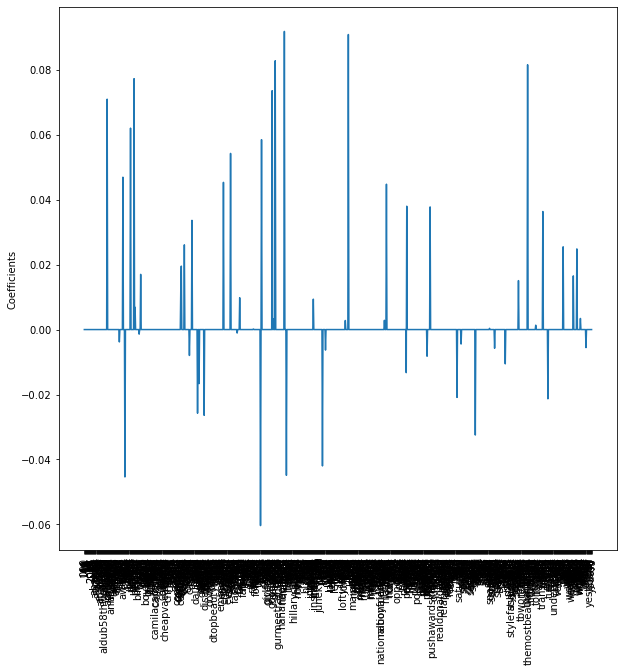

In [38]:
df_tfidf = featureselection(tfidf_array, labels, feature_name_tfidf, 0.01)

Models

Logistic Regression

Knn Classifier

Naive Bayes Classification

Support Vector Machine

Decision Tree

Random Forest Classifier

XGBoost

Function to Calculate all the accuracy for all the models

In [39]:
def modelaccuracy(Xtrain, Xtest, ytrain, ytest):
  accuracyscore = []
  #Logistic Regression
  modellr = LogisticRegression()    
  modellr.fit(Xtrain, ytrain)
  predictions = modellr.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with Logistic Regression is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  #Knn CLassifier
  knn = KNeighborsClassifier() 
  knn.fit(Xtrain, ytrain)
  predictions = knn.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with Knn Classifier is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  #Naive Bayes
  modelnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
  modelnb.fit(Xtrain, ytrain)
  predictions = modelnb.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with Naive Bayes Classification is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  #SVM
  svc=LinearSVC() 
  svc.fit(Xtrain, ytrain)
  predictions=svc.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with SVM Classification is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  #Decision trees
  my_tree_sk = DecisionTreeClassifier(criterion="gini",random_state=3).fit(Xtrain, ytrain)
  predictions = my_tree_sk.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with Decision Tree Classifier is:", ACC*100, "%")
  accuracyscore.append(ACC*100) 

  #Random Forest
  my_random_forest = RandomForestClassifier(max_depth = 2, n_estimators=2) 
  my_random_forest.fit(Xtrain, ytrain)
  predictions = my_random_forest.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with Random Forest Classifier is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  #XGboost
  XGBoost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(Xtrain, ytrain)
  predictions = XGBoost.predict(Xtest)
  ACC = accuracy_score(ytest, predictions)
  print("Accuracy for the test set with XGBoost is:", ACC*100, "%")
  accuracyscore.append(ACC*100)

  return(modellr, knn, modelnb, svc, my_tree_sk, my_random_forest, XGBoost, accuracyscore)

Training with Bag of Words

In [40]:
feature_name_bowtf = list(df_tfidf.columns)

In [41]:
bow = pd.DataFrame.sparse.from_spmatrix(Array_bow, columns=Feature_name_bow)
df_bow1 = bow[feature_name_bowtf].copy()

In [42]:
X_trainbow, X_testbow, y_trainbow, y_testbow = train_test_split(df_bow1, labels, random_state=42, test_size=0.3)

In [43]:
m1, m2, m3, m4, m5, m6, m7, accscbow = modelaccuracy(X_trainbow, X_testbow, y_trainbow, y_testbow)

Accuracy for the test set with Logistic Regression is: 87.38720187986773 %
Accuracy for the test set with Knn Classifier is: 87.07469809469592 %
Accuracy for the test set with Naive Bayes Classification is: 78.22708608389152 %
Accuracy for the test set with SVM Classification is: 87.3417798180695 %
Accuracy for the test set with Decision Tree Classifier is: 87.49318669073027 %
Accuracy for the test set with Random Forest Classifier is: 68.26633074528519 %
Accuracy for the test set with XGBoost is: 87.38417374241452 %


In [44]:
accscbow

[87.38720187986773,
 87.07469809469592,
 78.22708608389152,
 87.3417798180695,
 87.49318669073027,
 68.26633074528519,
 87.38417374241452]

Training with TF-IDF

In [45]:
X_traintf, X_testtf, y_traintf, y_testtf = train_test_split(df_tfidf, labels, random_state=42, test_size=0.3)

In [46]:
m1t, m2t, m3t, m4t, m5t, m6t, m7t, accsctfid = modelaccuracy(X_traintf, X_testtf, y_traintf, y_testtf)

Accuracy for the test set with Logistic Regression is: 87.38841313484902 %
Accuracy for the test set with Knn Classifier is: 87.26183698930463 %
Accuracy for the test set with Naive Bayes Classification is: 77.74985162126478 %
Accuracy for the test set with SVM Classification is: 87.34117419057887 %
Accuracy for the test set with Decision Tree Classifier is: 87.49318669073027 %
Accuracy for the test set with Random Forest Classifier is: 69.26016545743045 %
Accuracy for the test set with XGBoost is: 87.38417374241452 %


In [47]:
accsctfid 

[87.38841313484902,
 87.26183698930463,
 77.74985162126478,
 87.34117419057887,
 87.49318669073027,
 69.26016545743045,
 87.38417374241452]

Best model accuracy is with the following:
Decision Tree with TF-IDF has accuracy value of 87.49% for the testing set.

Testing it on the Canadian Election Dataset

Training the Decision Tree model on generic tweets 

In [70]:
#Decision trees
my_tree_sk = DecisionTreeClassifier(criterion="gini",random_state=3).fit(X_traintf, y_traintf)
predictions = my_tree_sk.predict(X_testtf)
ACC = accuracy_score(y_testtf, predictions)
print("Accuracy for the test set with Decision Tree Classifier is:", ACC*100, "%")

Accuracy for the test set with Decision Tree Classifier is: 87.49318669073027 %


In [49]:
electiontweets_clean

,sentiment,negative_reason,text,hashtag,username,tokenize_text,Party
0,negative,Women Reproductive right and Racism,b rosiebarton so instead of your suggestion ho...,"[#Canadian, #women, #AndrewScheer, #Conservati...",[@RosieBarton],"[b, rosiebarton, instead, suggest, agre, canad...",Conservative
1,positive,NaN,b allwomanspacewalk it s real n space_station ...,"[#AllWomanSpacewalk, #EtobicokeNorth, #CityofT...",[@Space_Station],"[b, allwomanspacewalk, real, n, space_st, n, e...",Other
2,negative,Economy,b brantford it s going to cost you 94 billion ...,"[#Brantford, #elxn43, #cdnpoli, #Canada]",[],"[b, brantford, go, cost, 94, billion, next, 4,...",Other
3,positive,NaN,b canada canadaelection2019 canadavotes n elxn...,"[#Canada, #CanadaElection2019, #CanadaVotes, #...",[],"[b, canada, canadaelection2019, canadavot, n, ...",Other
4,negative,Economy,b canada taxpayers are sick &amp tired of havi...,"[#Canada, #taxpayers, #TrudeauMustGo., #Canada...","[@SNCLavalin, @Sheila_Copps]","[b, canada, taxpay, sick, &, amp, tire, hard, ...",Liberals
...,...,...,...,...,...,...,...
2128,negative,Scandal,b you know he was doing a good enough job smea...,"[#cdnpoli, #elxn43]",[@AndrewScheer?],"[b, know, good, enough, job, smear, campaign, ...",Conservative
2129,negative,Scandal,b you missed the comment. deflecting the issue...,"[#cdnpoli, #elxn2019, #elxn43, #CanadaVotes]","[@kinsellawarren, @CPC_HQ]","[b, miss, comment, ., deflect, issu, answer, ....",Other
2130,positive,NaN,b your daily reminder n thejagmeetsingh endors...,"[#elxn43, #elxn2019, #CDNpoli, #LPC, #NDP, #GPC]",[@theJagmeetSingh],"[b, daili, remind, n, thejagmeetsingh, endors,...",NDP
2131,negative,Women Reproductive right and Racism,b yup...not going to reopen the abortion debat...,"[#elxn43, #ScheerLies, #ScheerHypocrisy]",[],"[b, yup, ..., go, reopen, abort, debat, ..., x...",Conservative


In [51]:
electiontweetsdata = electiontweets_clean['tokenize_text']
electiontweetsdata = electiontweetsdata.apply(remove_rt)
Array_ele, Feature_name_ele = tfidf(electiontweetsdata, 100000)

In [57]:
Notinlist = ['snail', 'transpond', 'bless', 'congratul', 'cute', 'congrat']

In [58]:
Selected_featuresele = list(df_tfidf.columns)

In [59]:
selfet = list(set(Selected_featuresele) - set(Notinlist))

In [ ]:
Feature_name_ele

In [60]:
dfele = pd.DataFrame.sparse.from_spmatrix(Array_ele, columns=Feature_name_ele)
Newdfele = dfele[selfet].copy()

In [62]:
for i in range(0, len(Notinlist)):
  Newdfele[Notinlist[i]] = pd.Series([0 for x in range(len(Newdfele.index))], index=Newdfele.index)

In [64]:
electiontweets_clean['sentiment'] = (electiontweets_clean['sentiment'] == 'positive').astype(int)

In [65]:
Targetstr = np.array(electiontweets_clean['sentiment'])

In [71]:
predictions = my_tree_sk.predict(Newdfele)
ACC = accuracy_score(Targetstr, predictions)
print("Accuracy for the test set with Decision Tree Classifier is:", ACC*100, "%")

Accuracy for the test set with Decision Tree Classifier is: 45.94467885607126 %


In [72]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)